In [8]:
# Near Miss DECISION TREE

import pandas as pd
from imblearn.under_sampling import NearMiss
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

NearMiss Decision Tree Performance:
Accuracy: 0.848189997907512
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      4740
         1.0       0.86      0.83      0.85      4818

    accuracy                           0.85      9558
   macro avg       0.85      0.85      0.85      9558
weighted avg       0.85      0.85      0.85      9558



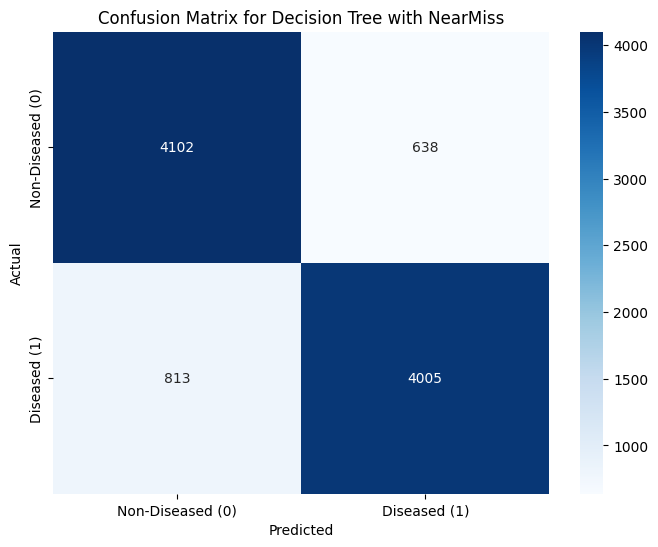

Sensitivity: 0.8313
Specificity: 0.8654


In [10]:


# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Apply NearMiss for undersampling
near_miss = NearMiss(sampling_strategy='majority', )
X_resampled, y_resampled = near_miss.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate Decision Tree
print("NearMiss Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Decision Tree with NearMiss')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall) and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


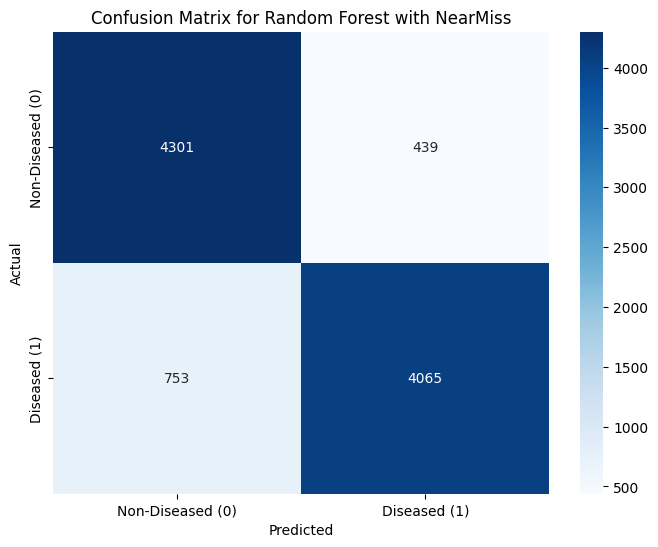

NearMiss Random Forest Performance:
Accuracy: 0.8753
MCC: 0.7523
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      4740
         1.0       0.90      0.84      0.87      4818

    accuracy                           0.88      9558
   macro avg       0.88      0.88      0.88      9558
weighted avg       0.88      0.88      0.88      9558

Sensitivity: 0.8437
Specificity: 0.9074
Time taken for training: 11.7366 seconds


In [7]:

#Near Miss Random Forest 

import pandas as pd
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Apply NearMiss for undersampling
near_miss = NearMiss(sampling_strategy='majority')

# Start timing the resampling and training process
start_time = time.time()

# Resample the dataset
X_resampled, y_resampled = near_miss.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred_rf = rf_classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
mcc = matthews_corrcoef(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Random Forest with NearMiss')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluate Random Forest
print("NearMiss Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"MCC: {mcc:.4f}")  # Display MCC
print(classification_report(y_test, y_pred_rf))
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Time taken for training: {training_time:.4f} seconds")  # Display training time


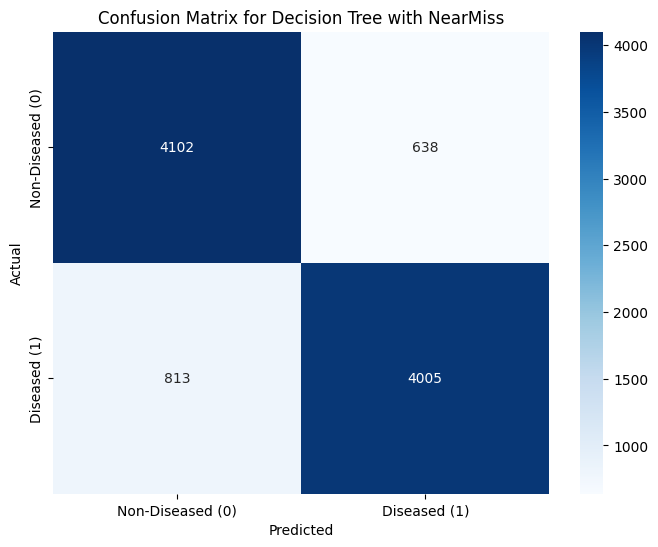

NearMiss Decision Tree Performance:
Accuracy: 0.8482
MCC: 0.6969
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      4740
         1.0       0.86      0.83      0.85      4818

    accuracy                           0.85      9558
   macro avg       0.85      0.85      0.85      9558
weighted avg       0.85      0.85      0.85      9558

Sensitivity: 0.8313
Specificity: 0.8654
Time taken for training: 7.0506 seconds


In [8]:
import pandas as pd
from imblearn.under_sampling import NearMiss
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Apply NearMiss for undersampling
near_miss = NearMiss(sampling_strategy='majority')

# Start timing the resampling and training process
start_time = time.time()

# Resample the dataset
X_resampled, y_resampled = near_miss.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred_dt = dt_classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
mcc = matthews_corrcoef(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Decision Tree with NearMiss')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluate Decision Tree
print("NearMiss Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"MCC: {mcc:.4f}")  # Display MCC
print(classification_report(y_test, y_pred_dt))
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Time taken for training: {training_time:.4f} seconds")  # Display training time
